<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>

# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [31]:
# CODE HERE
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [2]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

Label:  [3 9 2 2 7 9 9 1 7 3]
Class:  Dress Boot Sweater Sweater Sneaker Boot Boot Trouser Sneaker Dress


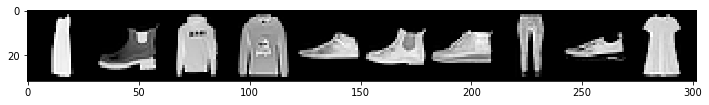

In [42]:
# CODE HERE
for images, labels in train_loader:
    break;

print("Label: ", labels.numpy())
print("Class: ", *[class_names[i] for i in labels])
    
im = make_grid(images, nrow=10)
plt.figure(figsize=(12, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


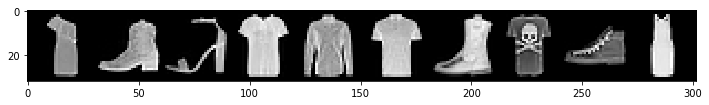

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


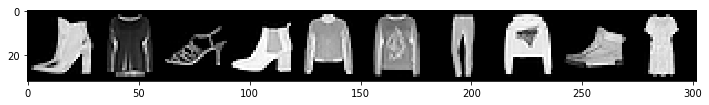

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

In [71]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [72]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [80]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(in_features=5 * 5 * 32, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = self.pool1(X)
        X = F.relu(self.conv2(X))
        X = self.pool1(X)
        X = F.relu(self.fc1(X.view(-1, 5 * 5 * 32)))
        X = F.log_softmax(self.fc2(X), dim=1)
        return X
    
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [81]:
count = 0
for params in model.parameters():
    count += params.numel()
    
count

212682

### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [6]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [83]:
epoch = 5

for i in range(epoch):
    
    i += 1
    
    for X_train, y_train in train_loader:
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        # Back-propagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'{i} of 5 epochs completed')



1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [89]:
model.eval()
with torch.no_grad():
    
    correct = 0
    
    for X_test, y_test in test_loader:
        
        y_pred = model(X_test)
        
        predicted = torch.max(y_pred, dim=1)[1]
        correct += (predicted == y_test).sum()

    print(f'Test accuracy: {correct}/10000 = {correct.item() / 10000 * 100:.3f}%')


Test accuracy: 8943/10000 = 89.430%


Test accuracy: 8733/10000 =  87.330%


## Great job!